In [4]:

import numpy as np
import pandas as pd
import scanpy as sc
import os
import matplotlib
import glob
import re
from statsmodels.stats.proportion import proportions_ztest

# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
from anndata import AnnData
import scanpy as sc
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

class IMMAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)

    def getPatel2019(self, tn=1, ta=0, tb=0):
        self.prepareData("AD8")
        atype = self.h.getSurvName('c tissue')
        ahash = {'Temporal_Cortex':1, 'Cerebellum':3,
                 'Frontal_Cortex':2, 'Entorhinal_Cortex':0}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c disease state')
        atypes = ['N', 'A', "AD"]
        ahash = {'AsymAD':1, 'AD':2, 'control':0}
        if (tn == 2):
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
            atypes = ['N', "AD"]
            ahash = {'AD':1, 'control':0}
        self.initData(atype, atypes, ahash)
        return
  
    
def getSViP():
    l1 = [bone.readList("covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

def getSimpleName(gene_groups, h):
    res = []
    for s in gene_groups:
        s1 = set()
        for g in s:
            for id1 in h.getIDs(g):
                name = h.getSimpleName(id1)
                if name != "" and name != "---":
                    s1.add(name)
        res.append(s1)
    return res

def getMacGeneGroups(order = None, weight = None, debug = 1):
    reload(hu)
    db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
    h = hu.Hegemon(db.getDataset("GL4"))
    h.init()
    h.initPlatform()
    h.initSurv()
    data_item = []
    dir1 = "/booleanfs2/sahoo/Data/Macrophage/BN/"
    with open(dir1 + 'figures/path-1.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-0.json') as data_file:
        l1 = json.load(data_file)
        data_item[5] = l1[5]
        data_item[6] = l1[6]
    with open(dir1 + 'figures/path-2.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-3.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-4.json') as data_file:
        data_item += json.load(data_file)
    cfile = dir1 + "figures/mac-net-cls.txt"
    if not os.path.isfile(cfile):
        print ("Can't open file {0} <br>".format(cfile))
        exit()
    fp = open(cfile, "r")
    nodelist = {}
    nhash = {}
    for line in fp:
        line = line.strip();
        ll = line.split("\t");
        nodelist[ll[0]] = ll[2:]
        for i in ll[2:]:
            nhash[i] = ll[0];
    fp.close();
    gene_groups = []
    for i in range(len(data_item)):
        gene_groups.append(set())
        gn = data_item[i][2][0][0]
        for g in data_item[i][2]:
            gene_groups[i].add(g[0])
            if g[0] in nodelist:
                for k in nodelist[g[0]]:
                    gene_groups[i].add(k)
        for g in data_item[i][3]:
            gene_groups[i].add(g)
            if g in nodelist:
                for k in nodelist[g]:
                    gene_groups[i].add(k)
        if debug == 1:
            print (i, gn, h.getSimpleName(gn), data_item[i][0], len(gene_groups[i]))
    print([len(s) for s in gene_groups])
    if order is None:
        order = [1, 3, 4, 5];
        order = [35]
        order = [43, 44, 45];
        order = [8, 9, 10]
    gene_groups = [gene_groups[i] for i in order]
    print([len(s) for s in gene_groups])
    gene_groups = getSimpleName(gene_groups, h)
    print([len(s) for s in gene_groups])
    if weight is None:
        weight = [-1, 1, 2, 3]
        weight = [-1, -2, -3]
        weight = [-1]
        weight = [-1, -2, -3]
    print (weight)
    genes = bone.readGenes(dir1 + "figures/cluster-names.txt")
    return genes, weight, gene_groups

def getCls13a14a3():
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls13():
    order = [13]
    wt1 = [-1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls14a3():
    order = [14, 3]
    wt1 = [1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def processOne(ana, order, wt1, ax1, ax2, id1 = None, l1=None, violin=1):
    genes = []
    if (l1 is None):
        nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
        sel = 2
        genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.orderData(l1, wt1)
    if id1 is None:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'ax': ax1, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        res = ana.getROCAUC()
        ax.text(len(ana.cval[0]), 4, res)
        if (violin == 1):
            params['ax'] = ax2
            params['vert'] = 0
            ax = ana.printViolin(None, params)
        else:
            ax = ana.densityPlot(ax2, acolor)
        return ana
    else:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        if (violin == 1):
            ax = ana.printViolin(None, {'vert':0})
        else:
            ax = ana.densityPlot()
    expr = ana.h.getExprData(id1)
    c = [acolor[ana.aval[i]] for i in ana.order]
    a = [ana.aval[i] for i in ana.order]
    x = [float(expr[i]) for i in ana.order]
    y = [ana.f_ranks[i - ana.h.start] for i in ana.order]
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['c'] = c
    df['a'] = a
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    for i in range(len(ana.atypes)):
        cond1 = (df['a'] == i)
        if (sum(cond1) > 0):
            s1 = np.max(df[cond1]['y']) - np.min(df[cond1]['y'])
            s2 = np.max(df[cond1]['x']) - np.min(df[cond1]['x'])
            df.loc[cond1, 'y'] += (np.mean(df[cond1]['x']) - df.loc[cond1, 'x']) * (s1+1) / (s2+1)
            df.loc[cond1, 'x'] -= (np.mean(df[cond1]['y']) - df.loc[cond1, 'y']) * (s2+1) / (s1+1)
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression(normalize=True)
    linreg.fit(np.array(df['x']).reshape(-1, 1),df['y'])
    y_pred = linreg.predict(np.array(df['x']).reshape(-1, 1))
    df['y1'] = (df['y'] - y_pred)
    ax = df.plot('x', 'y1', c=c, kind = 'scatter')
    ana.addAxes(ax)
    ana.f_ranks = df['y1']
    ana.i1 = [ana.order[i] for i in np.argsort(ana.f_ranks)]
    ana.f_ranks = [0 for i in ana.h.aRange()]
    for i in range(len(ana.order)):
        ana.f_ranks[ana.order[i] - ana.h.start] = df['y1'][i]
    index = np.array([i - ana.h.start for i in ana.i1])
    ana.cval = np.array([[ana.aval[i] for i in ana.i1]])
    ana.data = np.array([ana.expr[i] for i in ana.ind_r])[:,index]

    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
                  'genes': genes, 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    if (violin == 1):
        params['ax'] = ax2
        params['vert'] = 0
        ax = ana.printViolin(None, params)
    else:
        ax = ana.densityPlot(ax2, acolor)

    return ana

def processDataHnorm(ana, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13]
    wt1 = [-1]
    processOne(ana, order, wt1, ax1, ax2, id1)
    order = [14, 3]
    wt1 = [1, 2]
    processOne(ana, order, wt1, ax3, ax4, id1)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    processOne(ana, order, wt1, ax5, ax6, id1)
    return fig

def processDataHMm(ana, violin=1):
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    sel = 2
    order = [13]
    wt1 = [-1]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax = plt.subplot2grid((4, 3), (0, 0))
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': genes, 'ax': ax, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    ax = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax2 = plt.subplot2grid((4, 3), (0, 1))
    ax3 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    if (violin == 1):
        params['ax'] = ax
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#13")
    else:
        ax = ana.densityPlot(ax, acolor)
        ax.set_ylabel("Density - Cluster \\#13")
    #plt.tight_layout()
    order = [14, 3]
    wt1 = [1, 2]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    params.update({'ax':ax2})
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if (violin == 1):
        params['ax'] = ax3
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#14-3")
    else:
        ax = ana.densityPlot(ax3, acolor)
        ax.set_ylabel("Density - Cluster \\#14-3")
    ax2 = plt.subplot2grid((4, 3), (0, 2))
    ax3 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    params.update({'ax':ax2})
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if (violin == 1):
        params['ax'] = ax3
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#13-14-3")
    else:
        ax = ana.densityPlot(ax3, acolor)
        ax.set_ylabel("Density - Cluster \\#13-14-3")
    return fig

def getHigh(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    fp = ana.h.fp;
    fp.seek(0, 0);
    h = fp.readline();
    res = []
    index = 0
    for line in fp:
        line = line.strip();
        ll = line.split("\t")
        l1 = [i for i in order if i < len(ll) and
              ll[i] != '' and float(ll[i]) > thr]
        if len(l1) > nthr:
            res.append([ll[0], ana.h.getSimpleName(ll[0]), len(l1)])
        index += 1
        if (index % 1000) == 0:
            print(index)
    return res

def getHighJava(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    ofh = open(".arrorder", "w")
    for i in order:
        ofh.write(ana.headers[i] + "\n")
    ofh.close()
    from subprocess import check_output
    cmd = ['java', '-cp', '/booleanfs2/sahoo/Hegemon',
           'tools.Hegemon', 'high', ana.h.getPre(),
           '.arrorder', str(thr), str(nthr)]
    result = check_output(cmd, input='')
    l1 = result.decode('utf-8').split('\n')
    res = [k.split('\t') for k in l1 if k != '']
    res = [[k[0], ana.h.getSimpleName(k[0]), k[1]] for k in res]
    return res

def getCls14a3v2():
    l1 = [['RPS16', 'RPS21', 'RPL6', 'CCDC88A', 'RPL3', 'RPS15A', 'RPL14',
        'PCBP2', 'RPL23', 'RPL13', 'METTL7A'],
        ['CLEC10A', 'ANXA4', 'UBL3', 'RPS21', 'RPL6', 'RPS15A', 'ARL4C',
            'RPL14', 'HEXA', 'METTL7A', 'RPS16']]
    l1 = [['RPL24', 'NACA', 'RPS16', 'RPS21', 'RPL6', 'CCDC88A',
        'RPL3', 'RPS15A', 'EEF1B2', 'RPL14', 'PCBP2', 'RPL23',
        'RPL13', 'METTL7A', 'EEF2'],
        ['CLEC10A', 'INPP5A', 'NACA', 'ANXA4', 'UBL3', 'RPS21',
            'ITSN1', 'RPL24', 'RPS15A', 'ARL4C', 'RPL14', 'RPL6',
            'HEXA', 'METTL7A', 'EEF2', 'RPS16']]
    wt1 = [1, 2]
    return wt1, l1

bone.getCls13 = getCls13
bone.getCls14a3 = getCls14a3
bone.getCls13a14a3 = getCls13a14a3
bone.getCls14a3v2 = getCls14a3v2

def getIDhash(adata):
    idhash = {}
    for i in range(len(adata.raw.var['gene_symbols'])):
        k = adata.raw.var['gene_symbols'][i]
        v = adata.raw.var['gene_ids'][i]
        if k not in idhash:
            idhash[k] = []
        idhash[k] += [v]
    return idhash

def getRanks3(gene_groups, adata):
    idhash = getIDhash(adata)
    expr = []
    row_labels = []
    row_ids = []
    row_numhi = []
    ranks = []
    g_ind = 0
    counts = []
    for s in gene_groups:
        count = 0
        avgrank = [0] * adata.raw.n_obs
        for gn in s:
            if gn not in idhash:
                continue
            e = adata.raw.obs_vector(gn)
            v = e
            if (np.max(v) - np.min(v)) <= 0:
                continue
            t = hu.getThrData(v)
            te = []
            for i in range(len(e)):
                if e[i] == "":
                    v1 = - t[3] / 3;
                else:
                    v1 = (float(e[i]) - t[3]) / 3;
                if np.std(v) > 0:
                    v1 = v1 / np.std(v)
                avgrank[i] += v1
                te.append(v1)
            expr.append(te)
            row_labels.append(gn)
            row_ids.append(idhash[gn][0])
            v1 = [g_ind, sum(v > t[3])]
            if g_ind > 3:
                v1 = [g_ind, sum(v <= t[3])]
            else:
                v1 = [g_ind, sum(v > t[3])]
            row_numhi.append(v1)
            count += 1
            #if count > 200:
            #    break
        ranks.append(avgrank)
        g_ind += 1
        counts += [count]
    print (counts)
    return ranks, row_labels, row_ids, row_numhi, expr
def computeSMART(adata, org='Hs'):
    wt1, l1 = bone.getCls13()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c13'] = f_ranks

    wt1, l1 = bone.getCls14a3()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c14_3'] = f_ranks
    adata.obs['c14'] = ranks[0]
    adata.obs['c3'] = ranks[1]
    return adata
def computeSMARTv2(adata, org='Hs'):
    wt1, l1 = bone.getCls13()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c13'] = f_ranks

    wt1, l1 = bone.getCls14a3v2()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c14_3'] = f_ranks
    adata.obs['c14'] = ranks[0]
    adata.obs['c3'] = ranks[1]
    return adata
def convertString(data):
    for k in data.obs.columns:
        data.obs[k] = [k.decode('utf-8') if type(k) == bytes else k for k in data.obs[k]]
    for k in data.var.columns:
        data.var[k] = [k.decode('utf-8') if type(k) == bytes else k for k in data.var[k]]
    data.var_names = list(data.var['gene_symbols'])
    data.var_names_make_unique()
    data.obs_names = [k.decode('utf-8') if type(k) == bytes else k for k in data.obs_names]
    return data
def scatterPlot(data, gA, gB, col="red"):
    plotdf = sc.get.obs_df(data, keys=[gA, gB])
    return plotdf.plot.scatter(gA, gB, c=col)
def computePCAandUMAP(adata):
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    sc.pl.highest_expr_genes(adata, n_top=20)
    sc.pp.highly_variable_genes(adata, min_mean=0.01, max_mean=5, min_disp=0.5)
    sc.pl.highly_variable_genes(adata)
    adata = adata[:, adata.var.highly_variable]
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pl.pca_variance_ratio(adata, log=True)
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
    return adata

In [5]:
path = '/Users/edadlani/TAMs/GSE139555/'
mylist = [f for f in glob.glob(path + "*matrix.mtx.gz")]
mylist.sort()
mylist

['/Users/edadlani/TAMs/GSE139555/GSM4143674_SAM24356595-ct1.matrix.mtx.gz',
 '/Users/edadlani/TAMs/GSE139555/GSM4143675_SAM24356596-cn1.matrix.mtx.gz',
 '/Users/edadlani/TAMs/GSE139555/GSM4143676_SAM24358049-ct2.matrix.mtx.gz',
 '/Users/edadlani/TAMs/GSE139555/GSM4143677_SAM24358050-cn2.matrix.mtx.gz']

In [6]:
NumCells=!ls /Users/edadlani/TAMs/GSE139555/*barcodes* | while read line; do gunzip -c $line | wc -l; done;
sum_cnt = 0
for i in NumCells:
    print(i)
    sum_cnt += int(i)
sum_cnt

3878
3704
3274
1639


12495

In [7]:
adata = None
sizes = []
samples = []
index = 0

#single cell empty matrix
sc_mat = np.zeros((30727,sum_cnt))

col_idx = 0

for f in mylist:
    print(f"Working on {f}:")
    gsmid = re.sub(".*(GSM[0-9]+).*.", "\\1", f)
    print(f'gsmid:{gsmid}')
    print(f'index:{index}')
    print(f, gsmid)
    pre = re.sub("matrix.mtx.gz", "", f)
    print(f"pre:{pre}")
    data = sc.read_mtx(f, dtype='float32').T
    print(f'data:{data}')
    sc_data = data
    
    """
    #bulk counts
    features = pd.read_csv(pre+'features.tsv.gz', sep="\t", header=None)
    barcodes = pd.read_csv(pre+'barcodes.tsv.gz', sep="\t", header=None)  
    data.var_names = features[0].values
    data.obs_names = barcodes[0].values
    data.var['gene_symbols'] = features[1].values
    data.var['gene_ids'] = features[0].values
    print(f'data.X.sum(axis=0):{data.X.sum(axis=0)}')
    x = np.atleast_2d(data.X.sum(axis=0))
    print(f'x:{x}')
    print(f'shape(x):{np.shape(x)}')
    data = sc.AnnData(x, var=data.var, dtype=x.dtype)
    print(f'data:{data}')
    sizes += [data.shape]
    samples += [gsmid]
    if adata is None:
        adata = data
    else:
        adata = adata.concatenate(data, batch_key='sample')
    print(f'adata:{adata}')
    """  
    
    #update the single cell matrix 
    c = sc_data.X.tocoo()
    
    if index:
        col_idx += int(NumCells[index-1])
    
    print(f'Column start index: {col_idx}')
    
    index += 1
    print(f'No of files processed: {index}')
    
    sc_mat[c.col, c.row+col_idx] = c.data

Working on /Users/edadlani/TAMs/GSE139555/GSM4143674_SAM24356595-ct1.matrix.mtx.gz:
gsmid:GSM4143674
index:0
/Users/edadlani/TAMs/GSE139555/GSM4143674_SAM24356595-ct1.matrix.mtx.gz GSM4143674
pre:/Users/edadlani/TAMs/GSE139555/GSM4143674_SAM24356595-ct1.
data:AnnData object with n_obs × n_vars = 3878 × 30727
Column start index: 0
No of files processed: 1
Working on /Users/edadlani/TAMs/GSE139555/GSM4143675_SAM24356596-cn1.matrix.mtx.gz:
gsmid:GSM4143675
index:1
/Users/edadlani/TAMs/GSE139555/GSM4143675_SAM24356596-cn1.matrix.mtx.gz GSM4143675
pre:/Users/edadlani/TAMs/GSE139555/GSM4143675_SAM24356596-cn1.
data:AnnData object with n_obs × n_vars = 3704 × 30727
Column start index: 3878
No of files processed: 2
Working on /Users/edadlani/TAMs/GSE139555/GSM4143676_SAM24358049-ct2.matrix.mtx.gz:
gsmid:GSM4143676
index:2
/Users/edadlani/TAMs/GSE139555/GSM4143676_SAM24358049-ct2.matrix.mtx.gz GSM4143676
pre:/Users/edadlani/TAMs/GSE139555/GSM4143676_SAM24358049-ct2.
data:AnnData object with n_o

In [8]:
features = pd.read_csv('GSM4143674_SAM24356595-ct1.genes.tsv.gz', sep="\t", header=None, usecols=[0,1])


In [9]:

un_normalized = pd.DataFrame(sc_mat)
adata = sc.AnnData(un_normalized)
# sc.pp.normalize_total(adata, target_sum=1e6)
# sc.pp.log1p(adata, base=2)
df = pd.DataFrame(adata.X)

temp_df=df
temp_df.insert(loc = 0, column = 'ProbeId', value = features[0])
temp_df.insert(loc = 1, column = 'Name', value = features[1])

column_names = list(temp_df.columns)
GSM_ids=["ProbeId","Name"]
for x in column_names[2:]:
    if x>=0 and x<=3878:
        GSM_ids.append('GSM4143674')
    elif int(x)>3878 and int(x)<=3878+3704:
        GSM_ids.append('GSM4143675')
    elif x>3878+3704 and x<=3878+3704+3274:
        GSM_ids.append('GSM4143676')
    elif x>3878+3704+3274 and x<=3878+3704+3274+1639:
        GSM_ids.append('GSM4143677')
    
temp_df.columns = GSM_ids
temp_df

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,ProbeId,Name,GSM4143674,GSM4143674,GSM4143674,GSM4143674,GSM4143674,GSM4143674,GSM4143674,GSM4143674,...,GSM4143677,GSM4143677,GSM4143677,GSM4143677,GSM4143677,GSM4143677,GSM4143677,GSM4143677,GSM4143677,GSM4143677
0,GeneID:100505874,LOC100505874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GeneID:102724902,LOC102724902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GeneID:102724250,LOC102724250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GeneID:102725076,LOC102725076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GeneID:102725075,LOC102725075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30722,GeneID:4571,TRNP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30723,GeneID:102723461,LOC102723461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30724,GeneID:102723502,LOC102723502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30725,GeneID:339010,GeneID:339010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
temp_df2=temp_df.copy(deep=True)
temp_df2=temp_df2.drop(["ProbeId"],axis=1)

df_T = temp_df2.set_index('Name').T
df_mac = df_T.loc[(df_T['FCER1G'] > 2.0) & (df_T['TYROBP'] > 2.0)]
df_mac=df_mac.reset_index()

df_T2 = df_mac.set_index('index').T
df_T2=df_T2.reset_index()

df_mac3=df_T2
cols = ["ProbeId"]
count = 1
for column in df_T2.columns[1:]:
    cols.append(f'{column}_{count}')
    count+=1

df_mac3.columns = cols

expr = df_mac3.copy(deep=True)
expr = expr.drop(['ProbeId'], axis=1)
adata = AnnData(expr.T)
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata,base=2)

norm_df2 = pd.DataFrame(adata.X)
norm_df2 = norm_df2.T
norm_df2.insert(0, 'ProbeID', list(df_mac3['ProbeId']))
norm_df2.columns=list(df_mac3.columns)
norm_df2

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,ProbeId,GSM4143674_1,GSM4143674_2,GSM4143674_3,GSM4143674_4,GSM4143674_5,GSM4143674_6,GSM4143674_7,GSM4143674_8,GSM4143674_9,...,GSM4143677_663,GSM4143677_664,GSM4143677_665,GSM4143677_666,GSM4143677_667,GSM4143677_668,GSM4143677_669,GSM4143677_670,GSM4143677_671,GSM4143677_672
0,LOC100505874,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LOC102724902,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LOC102724250,0.0,0.0,5.299026,0.0,0.0,0.0,0.0,6.333027,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LOC102725076,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LOC102725075,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30722,TRNP,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30723,LOC102723461,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30724,LOC102723502,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30725,GeneID:339010,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
gene_names=list(df_mac3["ProbeId"])
df_mac3.set_index('ProbeId').T


tumor_types={"GSM4143674":"Tumor","GSM4143675":"Normal","GSM4143676":"Tumor",
            "GSM4143677":"Normal"}
list_of_tumor=[]
for element in list(df_mac3.columns)[1:]:
    GSM=element.split("_")[0]
    list_of_tumor.append(tumor_types[GSM])
    


In [12]:
adata2 = AnnData(norm_df2.set_index('ProbeId').T)
adata2.raw = adata2
adata2.raw.var['gene_symbols'] = gene_names
adata2.raw.var['gene_ids'] = gene_names
adata2.obs["tumor"]=list_of_tumor

computeSMART(adata2)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66]
[48]
[-1]
[48]
[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[144, 168]
[137, 153]
[1, 2]
[113, 122]


AnnData object with n_obs × n_vars = 672 × 30727
    obs: 'tumor', 'c13', 'c14_3', 'c14', 'c3'

[18.40122323681497, 314.2011161624216, 17.90122323681497, 18.90122323681497]
[-189.0215044718663, 342.91612101702464, -189.5215044718663, -188.5215044718663]
Counter({'Tumor': 92, 'Normal': 3}) Counter({'Tumor': 615, 'Normal': 57})
Counter({'Tumor': 99, 'Normal': 17}) Counter({'Tumor': 615, 'Normal': 57})


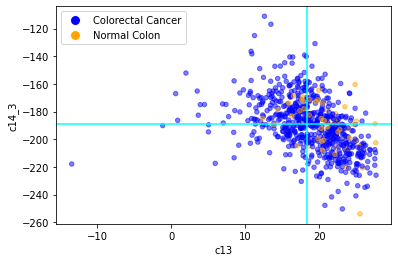

In [13]:
plotdf = sc.get.obs_df(adata2, keys=["c13", "c14_3", 'tumor'])

#ahash = {'Tumor':'red','Normal':'green'}
ahash = {'Tumor':'blue','Normal':'orange'}
thr1 = hu.getThrData(plotdf['c13'])
thr2 = hu.getThrData(plotdf['c14_3'])
    
print(thr1)
print(thr2)
c1 = (plotdf['c13'] <= thr1[0])
c2 = (plotdf['c14_3'] <= thr2[0])

c3 = (plotdf['c13'] > thr1[0])
c4 = (plotdf['c14_3'] > thr2[0])

plotdf['color'] = [ahash[k] for k in plotdf['tumor']]
ax=plotdf.plot.scatter("c13", "c14_3", c="color", alpha=0.5, rasterized=True)
ax.axhline(y=thr2[0], color='cyan')
ax.axvline(x=thr1[0], color='cyan')

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Colorectal Cancer'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Normal Colon')
]

# Add custom legend to the plot
ax.legend(handles=handles)


print(Counter(plotdf[c1 & c2]['tumor']), Counter(plotdf['tumor']))
print(Counter(plotdf[c3 & c4]['tumor']), Counter(plotdf['tumor']))

In [14]:
stats, pval=proportions_ztest(3, 57, 92/615)
print(pval)

0.0010441402123724044


In [15]:
stats, pval=proportions_ztest(17, 57, 99/615)
print(pval)

0.02349179735473882
